# **FUZZY LOGIC 10 BENGKEL TERBAIK**

**NAMA ANGGOTA :**


[1] **Zahran Raihansyah Likumahuwa - 130120**

[2] **Muhammad Reza Adi Nugraha - 1301204078**



## **LIBRARY**

In [ ]:
import pandas as pd

## **DATA**

In [ ]:
#Pastikan dataset sudah diupload di google colab dengan path seperti berikut
data_bengkel = pd.read_excel("/content/bengkel.xlsx")
data_bengkel

,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


## **FUNGSI KEANGGOTAAN**

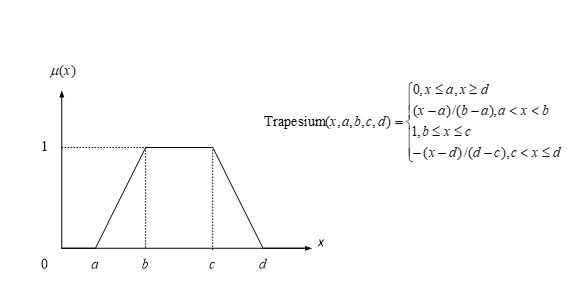

### Fungsi Keanggotaan Kualitas Servis



*   Merah = Buruk `a=0; b=0 ; c=20; d=40`
*   Ungu = Standar `a=20; b=40; c=60; d=80`
*   Oranye = Baik `a=60; b=80; c=max; d=max`



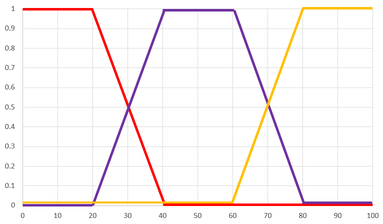

### Fungsi Keanggotaan Harga



*   Biru = Murah `a=0; b=0; c=2; d=4`
*   Kuning = Sedang `a=2; b=4; c=6; d=8`
*   Hiaju = Mahal `a=6; b=8; c=max; d=max`



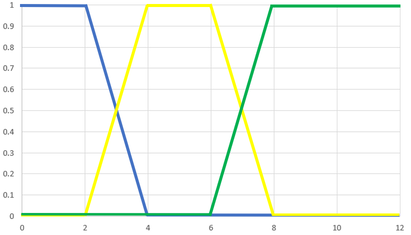

## **FUZZIFIKASI**

In [ ]:
def fuzzifikasi(data_bengkel):

  #Fuzzifikasi Kulitas Servis
  #Simpan data hasil perhitungan ke dalam dictinonary sebelum disatukan ke dalam dataframe
  data_buruk = {"buruk":[]}
  data_standar = {"standar":[]}
  data_baik = {"baik":[]}
  for index in range(100):
    value = data_bengkel["servis"][index]
    if value >= 0 and value <= 20:
      buruk = 1
      standar = 0
      baik = 0
    elif value > 20 and value < 40:
      buruk = -(value-40)/(40-20)
      standar = (value-20)/(40-20)
      baik =  0
    elif value >= 40 and value <= 60:
      buruk = 0
      standar = 1
      baik = 0
    elif value > 60 and value < 80:
      buruk = 0
      standar = -(value-80)/(80-60)
      baik = (value-60)/(80-60)
    else:
      buruk = 0
      standar = 0
      baik = 1

    data_buruk["buruk"].append(buruk)
    data_standar["standar"].append(standar)
    data_baik["baik"].append(baik)
  
  #Data yang disimpan dalam dictionary dimasukkan ke dalam dataframe
  data_buruk = pd.DataFrame(data_buruk)
  data_standar = pd.DataFrame(data_standar)
  data_baik = pd.DataFrame(data_baik)

  data_bengkel["buruk"] = data_buruk
  data_bengkel["standar"] = data_standar
  data_bengkel["baik"] = data_baik

  #Fuzzifiksi Harga
  #Simpan data hasil perhitungan ke dalam dictinonary sebelum disatukan ke dalam dataframe
  data_murah = {"murah":[]}
  data_sedang = {"sedang":[]}
  data_mahal = {"mahal":[]}
  for index in range(100):
    value = data_bengkel["harga"][index]
    if value >= 0 and value <= 2:
      murah = 1
      sedang = 0
      mahal = 0
    elif value > 2 and value < 4:
      murah = -(value-4)/(4-2)
      sedang = (value-2)/(4-2)
      mahal = 0
    elif value >= 4 and value <= 6:
      murah = 0
      sedang = 1
      mahal = 0
    elif value > 6 and value < 8:
      murah = 0
      sedang = -(value-8)/(8-6)
      mahal = (value-6)/(8-6)
    else:
      murah = 0
      sedang = 0
      mahal = 1
    data_murah["murah"].append(murah)
    data_sedang["sedang"].append(sedang)
    data_mahal["mahal"].append(mahal)
    
  #Data yang disimpan dalam dictionary dimasukkan ke dalam dataframe
  data_murah = pd.DataFrame(data_murah)
  data_sedang = pd.DataFrame(data_sedang)
  data_mahal = pd.DataFrame(data_mahal)

  data_bengkel["murah"] = data_murah
  data_bengkel["sedang"] = data_sedang
  data_bengkel["mahal"] = data_mahal

In [ ]:
#Menampilkan hasil fuzzifikasi
fuzzifikasi(data_bengkel)
data_bengkel

,id,servis,harga,buruk,standar,baik,murah,sedang,mahal
0,1,58,7,0.00,1.00,0.0,0.0,0.5,0.5
1,2,54,1,0.00,1.00,0.0,1.0,0.0,0.0
2,3,98,2,0.00,0.00,1.0,1.0,0.0,0.0
3,4,52,4,0.00,1.00,0.0,0.0,1.0,0.0
4,5,11,4,1.00,0.00,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.50,0.50,0.0,1.0,0.0,0.0
96,97,25,3,0.75,0.25,0.0,0.5,0.5,0.0
97,98,27,10,0.65,0.35,0.0,0.0,0.0,1.0
98,99,8,6,1.00,0.00,0.0,0.0,1.0,0.0


## **INFERENSI**

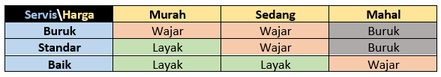

In [ ]:
def inferensi(data_bengkel):

  #Simpan data hasil perhitungan ke dalam dictinonary sebelum disatukan ke dalam dataframe
  buruk = {"inferensi_buruk":[]}
  wajar = {"inferensi_wajar":[]}
  layak = {"inferensi_layak":[]}

  #Simpan nilai sementara untuk nilai linguistik Penilaian, akan diambil nilai terbesarnya
  temp_buruk = []
  temp_wajar = []
  temp_layak = []

  #Ambil nilai minimum untuk nilai linguistik Kualitas Servis dan Harga yang sesuai dengan tabel inferensi
  for index in range(100):
    #Servis Buruk
    if data_bengkel["buruk"][index] != 0 and data_bengkel["murah"][index] != 0:
      temp_wajar.append(min(data_bengkel["buruk"][index],data_bengkel["murah"][index]))
    if data_bengkel["buruk"][index] != 0 and data_bengkel["sedang"][index] != 0:
      temp_wajar.append(min(data_bengkel["buruk"][index],data_bengkel["sedang"][index]))
    if data_bengkel["buruk"][index] != 0 and data_bengkel["mahal"][index] != 0:
      temp_buruk.append(min(data_bengkel["buruk"][index],data_bengkel["mahal"][index]))

    #Servis Standar
    if data_bengkel["standar"][index] != 0 and data_bengkel["murah"][index] != 0:
      temp_layak.append(min(data_bengkel["standar"][index], data_bengkel["murah"][index]))
    if data_bengkel["standar"][index] != 0 and data_bengkel["sedang"][index] != 0:
      temp_wajar.append(min(data_bengkel["standar"][index], data_bengkel["sedang"][index]))
    if data_bengkel["standar"][index] != 0 and data_bengkel["mahal"][index] != 0:
      temp_buruk.append(min(data_bengkel["standar"][index], data_bengkel["mahal"][index]))

    #Servis Baik
    if data_bengkel["baik"][index] != 0 and data_bengkel["murah"][index] != 0:
      temp_layak.append(min(data_bengkel["baik"][index], data_bengkel["murah"][index]))
    if data_bengkel["baik"][index] != 0 and data_bengkel["sedang"][index] != 0:
      temp_layak.append(min(data_bengkel["baik"][index], data_bengkel["sedang"][index]))
    if data_bengkel["baik"][index] != 0 and data_bengkel["mahal"][index] != 0:
      temp_wajar.append(min(data_bengkel["baik"][index], data_bengkel["mahal"][index]))

    if len(temp_buruk) != 0:
      buruk["inferensi_buruk"].append(max(temp_buruk))
    else:
      buruk["inferensi_buruk"].append(0)

    if len(temp_wajar) != 0:
      wajar["inferensi_wajar"].append(max(temp_wajar))
    else:
      wajar["inferensi_wajar"].append(0)

    if len(temp_layak) != 0:
      layak["inferensi_layak"].append(max(temp_layak))
    else:
      layak["inferensi_layak"].append(0)

    temp_buruk.clear()
    temp_wajar.clear()
    temp_layak.clear()
  
  #Masukkan data dalam dictioanry ke dalam datafrmae
  buruk = pd.DataFrame(buruk)
  wajar = pd.DataFrame(wajar)
  layak = pd.DataFrame(layak)

  data_bengkel["inferensi_buruk"] = buruk
  data_bengkel["inferensi_wajar"] = wajar
  data_bengkel["inferensi_layak"] = layak

In [ ]:
inferensi(data_bengkel)
data_bengkel

,id,servis,harga,buruk,standar,baik,murah,sedang,mahal,inferensi_buruk,inferensi_wajar,inferensi_layak
0,1,58,7,0.00,1.00,0.0,0.0,0.5,0.5,0.50,0.5,0.00
1,2,54,1,0.00,1.00,0.0,1.0,0.0,0.0,0.00,0.0,1.00
2,3,98,2,0.00,0.00,1.0,1.0,0.0,0.0,0.00,0.0,1.00
3,4,52,4,0.00,1.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00
4,5,11,4,1.00,0.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.50,0.50,0.0,1.0,0.0,0.0,0.00,0.5,0.50
96,97,25,3,0.75,0.25,0.0,0.5,0.5,0.0,0.00,0.5,0.25
97,98,27,10,0.65,0.35,0.0,0.0,0.0,1.0,0.65,0.0,0.00
98,99,8,6,1.00,0.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00


## **DEFUZZIFIKASI**

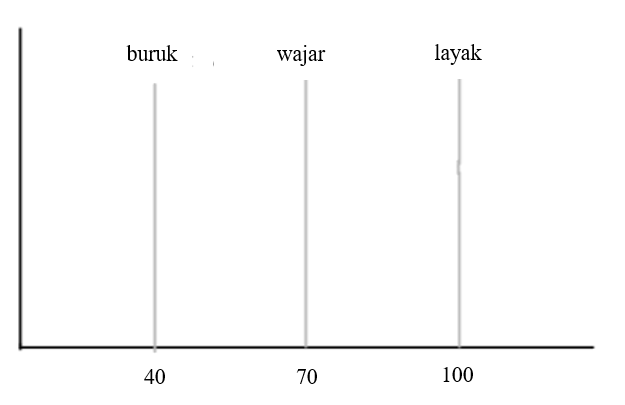

In [ ]:
def defuzzifikasi(data_bengkel):
  nilai_akhir = {"nilai_akhir":[]}
  for index in range(100):

    data_buruk = data_bengkel["inferensi_buruk"][index]
    data_wajar = data_bengkel["inferensi_wajar"][index]
    data_layak = data_bengkel["inferensi_layak"][index]

    value = ((data_buruk*40) + (data_wajar*70) + (data_layak*100)) / (data_buruk + data_wajar + data_layak)
    nilai_akhir["nilai_akhir"].append(value)
  
  nilai_akhir = pd.DataFrame(nilai_akhir)
  data_bengkel["nilai_akhir"] = nilai_akhir

In [ ]:
defuzzifikasi(data_bengkel)
data_bengkel

,id,servis,harga,buruk,standar,baik,murah,sedang,mahal,inferensi_buruk,inferensi_wajar,inferensi_layak,nilai_akhir
0,1,58,7,0.00,1.00,0.0,0.0,0.5,0.5,0.50,0.5,0.00,55.0
1,2,54,1,0.00,1.00,0.0,1.0,0.0,0.0,0.00,0.0,1.00,100.0
2,3,98,2,0.00,0.00,1.0,1.0,0.0,0.0,0.00,0.0,1.00,100.0
3,4,52,4,0.00,1.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00,70.0
4,5,11,4,1.00,0.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,30,1,0.50,0.50,0.0,1.0,0.0,0.0,0.00,0.5,0.50,85.0
96,97,25,3,0.75,0.25,0.0,0.5,0.5,0.0,0.00,0.5,0.25,80.0
97,98,27,10,0.65,0.35,0.0,0.0,0.0,1.0,0.65,0.0,0.00,40.0
98,99,8,6,1.00,0.00,0.0,0.0,1.0,0.0,0.00,1.0,0.00,70.0


## **OUTPUT AKHIR**

In [ ]:
#Urutkan data
data_bengkel.sort_values(by='nilai_akhir', ascending=False, inplace=True)
#Ubah index
data_bengkel.index = range(len(data_bengkel))

#Ambil 10 data teratas
data_akhir = data_bengkel.head(10)
#Urutkan berdasarkan inferensi layak tertinggi
data_akhir.sort_values(by="inferensi_layak", ascending=False, inplace=True)
#Ubah index
data_akhir.index = range(10)
data_akhir

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,servis,harga,buruk,standar,baik,murah,sedang,mahal,inferensi_buruk,inferensi_wajar,inferensi_layak,nilai_akhir
0,2,54,1,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,1.00,100.0
1,21,48,2,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,1.00,100.0
2,89,48,2,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,1.00,100.0
3,16,82,6,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.00,100.0
4,34,93,4,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,1.00,100.0
5,75,61,1,0.0,0.95,0.05,1.0,0.0,0.0,0.0,0.0,0.95,100.0
6,44,63,2,0.0,0.85,0.15,1.0,0.0,0.0,0.0,0.0,0.85,100.0
7,91,98,3,0.0,0.00,1.00,0.5,0.5,0.0,0.0,0.0,0.50,100.0
8,92,83,3,0.0,0.00,1.00,0.5,0.5,0.0,0.0,0.0,0.50,100.0
9,13,80,3,0.0,0.00,1.00,0.5,0.5,0.0,0.0,0.0,0.50,100.0


## **UBAH KE FILE**

In [ ]:
data_akhir.to_excel("top_10_bengkel.xlsx")